In [10]:
# Connect to the database
import datajoint as dj
acquisition = dj.create_virtual_module("aeon_test_acquisition", "aeon_test_acquisition")
streams = dj.create_virtual_module("aeon_test_streams", "aeon_test_streams")

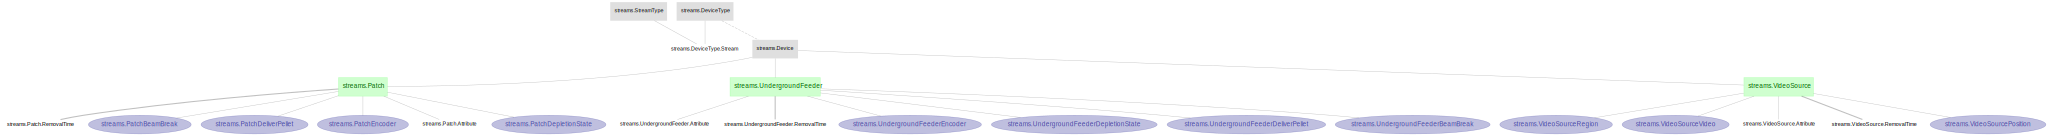

In [9]:
dj.Diagram(streams)

In [12]:
acquisition.Experiment.Directory()  # raw data read from this directory

experiment_name e.g exp0-r0,directory_type,repository_name,directory_path
exp0.2-r0,quality-control,ceph_aeon,aeon/data/qc/AEON2/experiment0.2
exp0.2-r0,raw,ceph_aeon,aeon/data/raw/AEON2/experiment0.2
presocial0.1-a2,raw,ceph_aeon,aeon/data/raw/AEON2/presocial0.1
presocial0.1-a3,raw,ceph_aeon,aeon/data/raw/AEON3/presocial0.1
presocial0.1-a4,raw,ceph_aeon,aeon/data/raw/AEON4/presocial0.1


In [14]:
display(streams.StreamType())
display(streams.DeviceType.Stream())
display(streams.Device())

stream_type,stream_reader name of the reader class found in `aeon_mecha` package (e.g. aeon.io.reader.Video),stream_reader_kwargs keyword arguments to instantiate the reader class,stream_description,"stream_hash hash of dict(stream_reader_kwargs, stream_reader=stream_reader)"
BackgroundColor,aeon.io.reader.Csv,=BLOB=,,5db1b232-45b5-c2d1-882d-c1bc59c5945d
BeamBreak,aeon.io.reader.BitmaskEvent,=BLOB=,,b14171e6-d27d-117a-ae73-a16c4b5fc8a2
BeamBreak0,aeon.io.reader.DigitalBitmask,=BLOB=,,67f8301f-7891-143e-9817-389c50cec2d5
BeamBreak1,aeon.io.reader.DigitalBitmask,=BLOB=,,2064e46c-a7e9-3f71-2f9b-fc3985845f73
BeamBreak2,aeon.io.reader.DigitalBitmask,=BLOB=,,a6f0a263-1461-813d-17a7-af4bcfb0e558
ChangeSubjectState,aeon.io.reader.Csv,=BLOB=,,9e67d1b6-7eef-5fb6-09a2-b0a0ae95172c
ClearLed0,aeon.io.reader.BitmaskEvent,=BLOB=,,ff20de64-1e2b-a967-a4b3-caa93e10c21d
ClearLed1,aeon.io.reader.BitmaskEvent,=BLOB=,,d3c84e13-919d-2b15-f755-c363fe5544e2
ClearLed2,aeon.io.reader.BitmaskEvent,=BLOB=,,dbc1f269-ade0-55ad-bad5-a736971a1552
ClearValve0,aeon.io.reader.BitmaskEvent,=BLOB=,,eaffcc14-21ef-63bc-c9e1-27e1fa439f3a


device_type,stream_type
Patch,BeamBreak
Patch,DeliverPellet
Patch,DepletionState
Patch,Encoder
UndergroundFeeder,BeamBreak
UndergroundFeeder,DeliverPellet
UndergroundFeeder,DepletionState
UndergroundFeeder,Encoder
VideoSource,Position
VideoSource,Region


device_serial_number,device_type
COM4,Patch
COM7,Patch
21053810,VideoSource
21053811,VideoSource
21177888,VideoSource
21196927,VideoSource
21196933,VideoSource
21199215,VideoSource
21199217,VideoSource
21199221,VideoSource


In [16]:
display(acquisition.Epoch())
display(acquisition.Chunk())

experiment_name e.g exp0-r0,epoch_start
presocial0.1-a2,2023-02-25 18:03:49
presocial0.1-a2,2023-02-25 18:26:39
presocial0.1-a2,2023-02-25 18:30:19
presocial0.1-a2,2023-02-25 18:38:03
presocial0.1-a2,2023-02-27 14:27:37
presocial0.1-a2,2023-02-27 14:31:29
presocial0.1-a2,2023-02-27 14:42:09
presocial0.1-a2,2023-02-28 11:31:01
presocial0.1-a2,2023-02-28 11:44:43
presocial0.1-a2,2023-02-28 11:48:55


experiment_name e.g exp0-r0,chunk_start datetime of the start of a given acquisition chunk,chunk_end datetime of the end of a given acquisition chunk,directory_type,epoch_start
presocial0.1-a2,2023-02-25 18:00:00,2023-02-25 18:26:39,raw,2023-02-25 18:03:49
presocial0.1-a2,2023-02-25 18:26:39,2023-02-25 18:30:19,raw,2023-02-25 18:26:39
presocial0.1-a2,2023-02-25 18:30:19,2023-02-25 18:38:03,raw,2023-02-25 18:30:19
presocial0.1-a2,2023-02-25 18:38:03,2023-02-25 19:00:00,raw,2023-02-25 18:38:03
presocial0.1-a2,2023-02-27 14:00:00,2023-02-27 14:31:29,raw,2023-02-27 14:27:37
presocial0.1-a2,2023-02-27 14:31:29,2023-02-27 14:42:09,raw,2023-02-27 14:31:29
presocial0.1-a2,2023-02-27 14:42:09,2023-02-27 15:00:00,raw,2023-02-27 14:42:09
presocial0.1-a2,2023-02-27 15:00:00,2023-02-27 16:00:00,raw,2023-02-27 14:42:09
presocial0.1-a2,2023-02-27 16:00:00,2023-02-27 17:00:00,raw,2023-02-27 14:42:09
presocial0.1-a2,2023-02-27 17:00:00,2023-02-27 18:00:00,raw,2023-02-27 14:42:09


In [17]:
streams.PatchBeamBreak()

experiment_name e.g exp0-r0,device_serial_number,patch_install_time time of the patch placed and started operation at this position,chunk_start datetime of the start of a given acquisition chunk,sample_count number of data points acquired from this stream for a given chunk,timestamps (datetime) timestamps of BeamBreak data,event
presocial0.1-a2,COM4,2023-02-25 18:03:49,2023-02-25 18:26:39,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-25 18:03:49,2023-02-25 18:30:19,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-25 18:03:49,2023-02-25 18:38:03,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-25 18:03:49,2023-02-27 14:00:00,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-27 14:31:29,2023-02-27 14:31:29,11,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-27 14:31:29,2023-02-27 14:42:09,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-27 14:31:29,2023-02-27 15:00:00,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-27 14:31:29,2023-02-27 16:00:00,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-27 14:31:29,2023-02-27 17:00:00,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-27 14:31:29,2023-02-27 18:00:00,0,=BLOB=,=BLOB=


In [21]:
(streams.PatchBeamBreak & 'chunk_start="2023-02-27 14:31:29	"' & 'device_serial_number="COM4"').fetch("timestamps")

array([array(['2023-02-27T14:32:32.458399773', '2023-02-27T14:34:21.492063999',
              '2023-02-27T14:34:21.506624222', '2023-02-27T14:34:42.680992126',
              '2023-02-27T14:34:42.696224213', '2023-02-27T14:34:43.294752121',
              '2023-02-27T14:34:43.306911945', '2023-02-27T14:38:07.860288143',
              '2023-02-27T14:38:07.873087883', '2023-02-27T14:38:09.855296135',
              '2023-02-27T14:38:09.866879940'], dtype='datetime64[ns]')        ],
      dtype=object)